<a href="https://colab.research.google.com/github/dgscharan/Computer_vision/blob/main/FindingParallelLines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

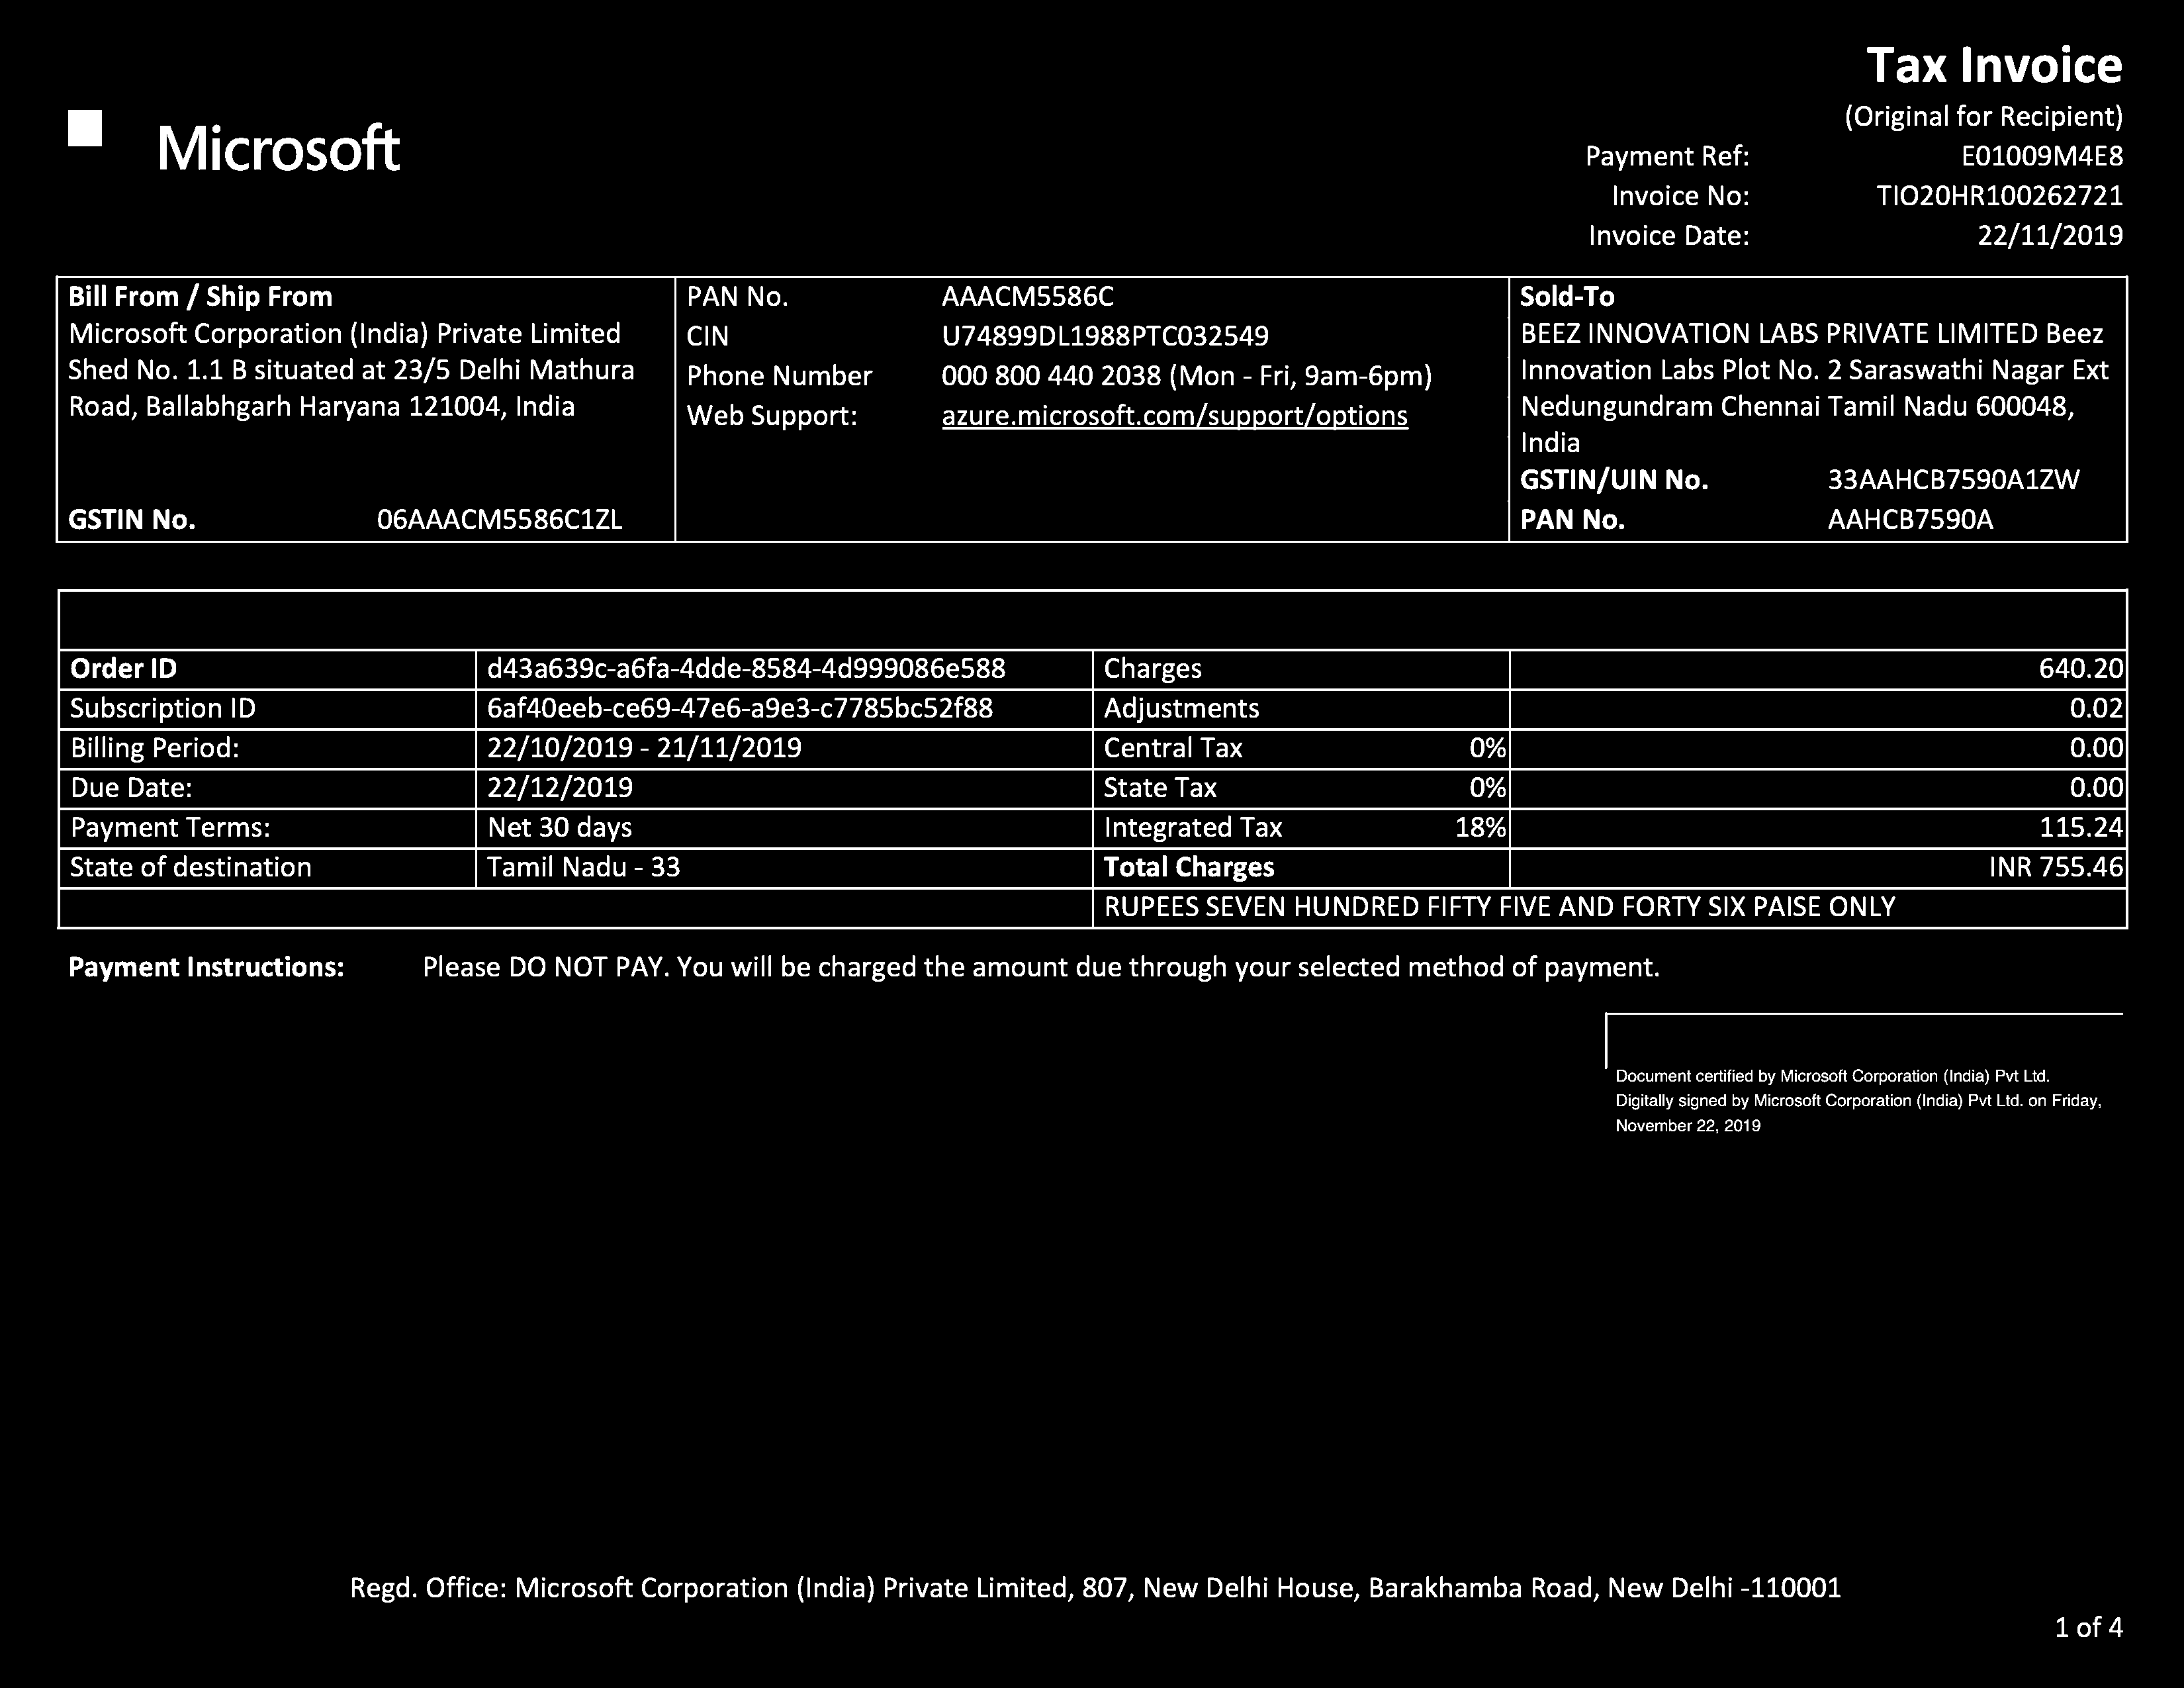

In [ ]:

img = cv2.imread('Invoice_201912.png', 0)
(thresh, img_bin) = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin = 255-img_bin
cv2_imshow(img_bin)



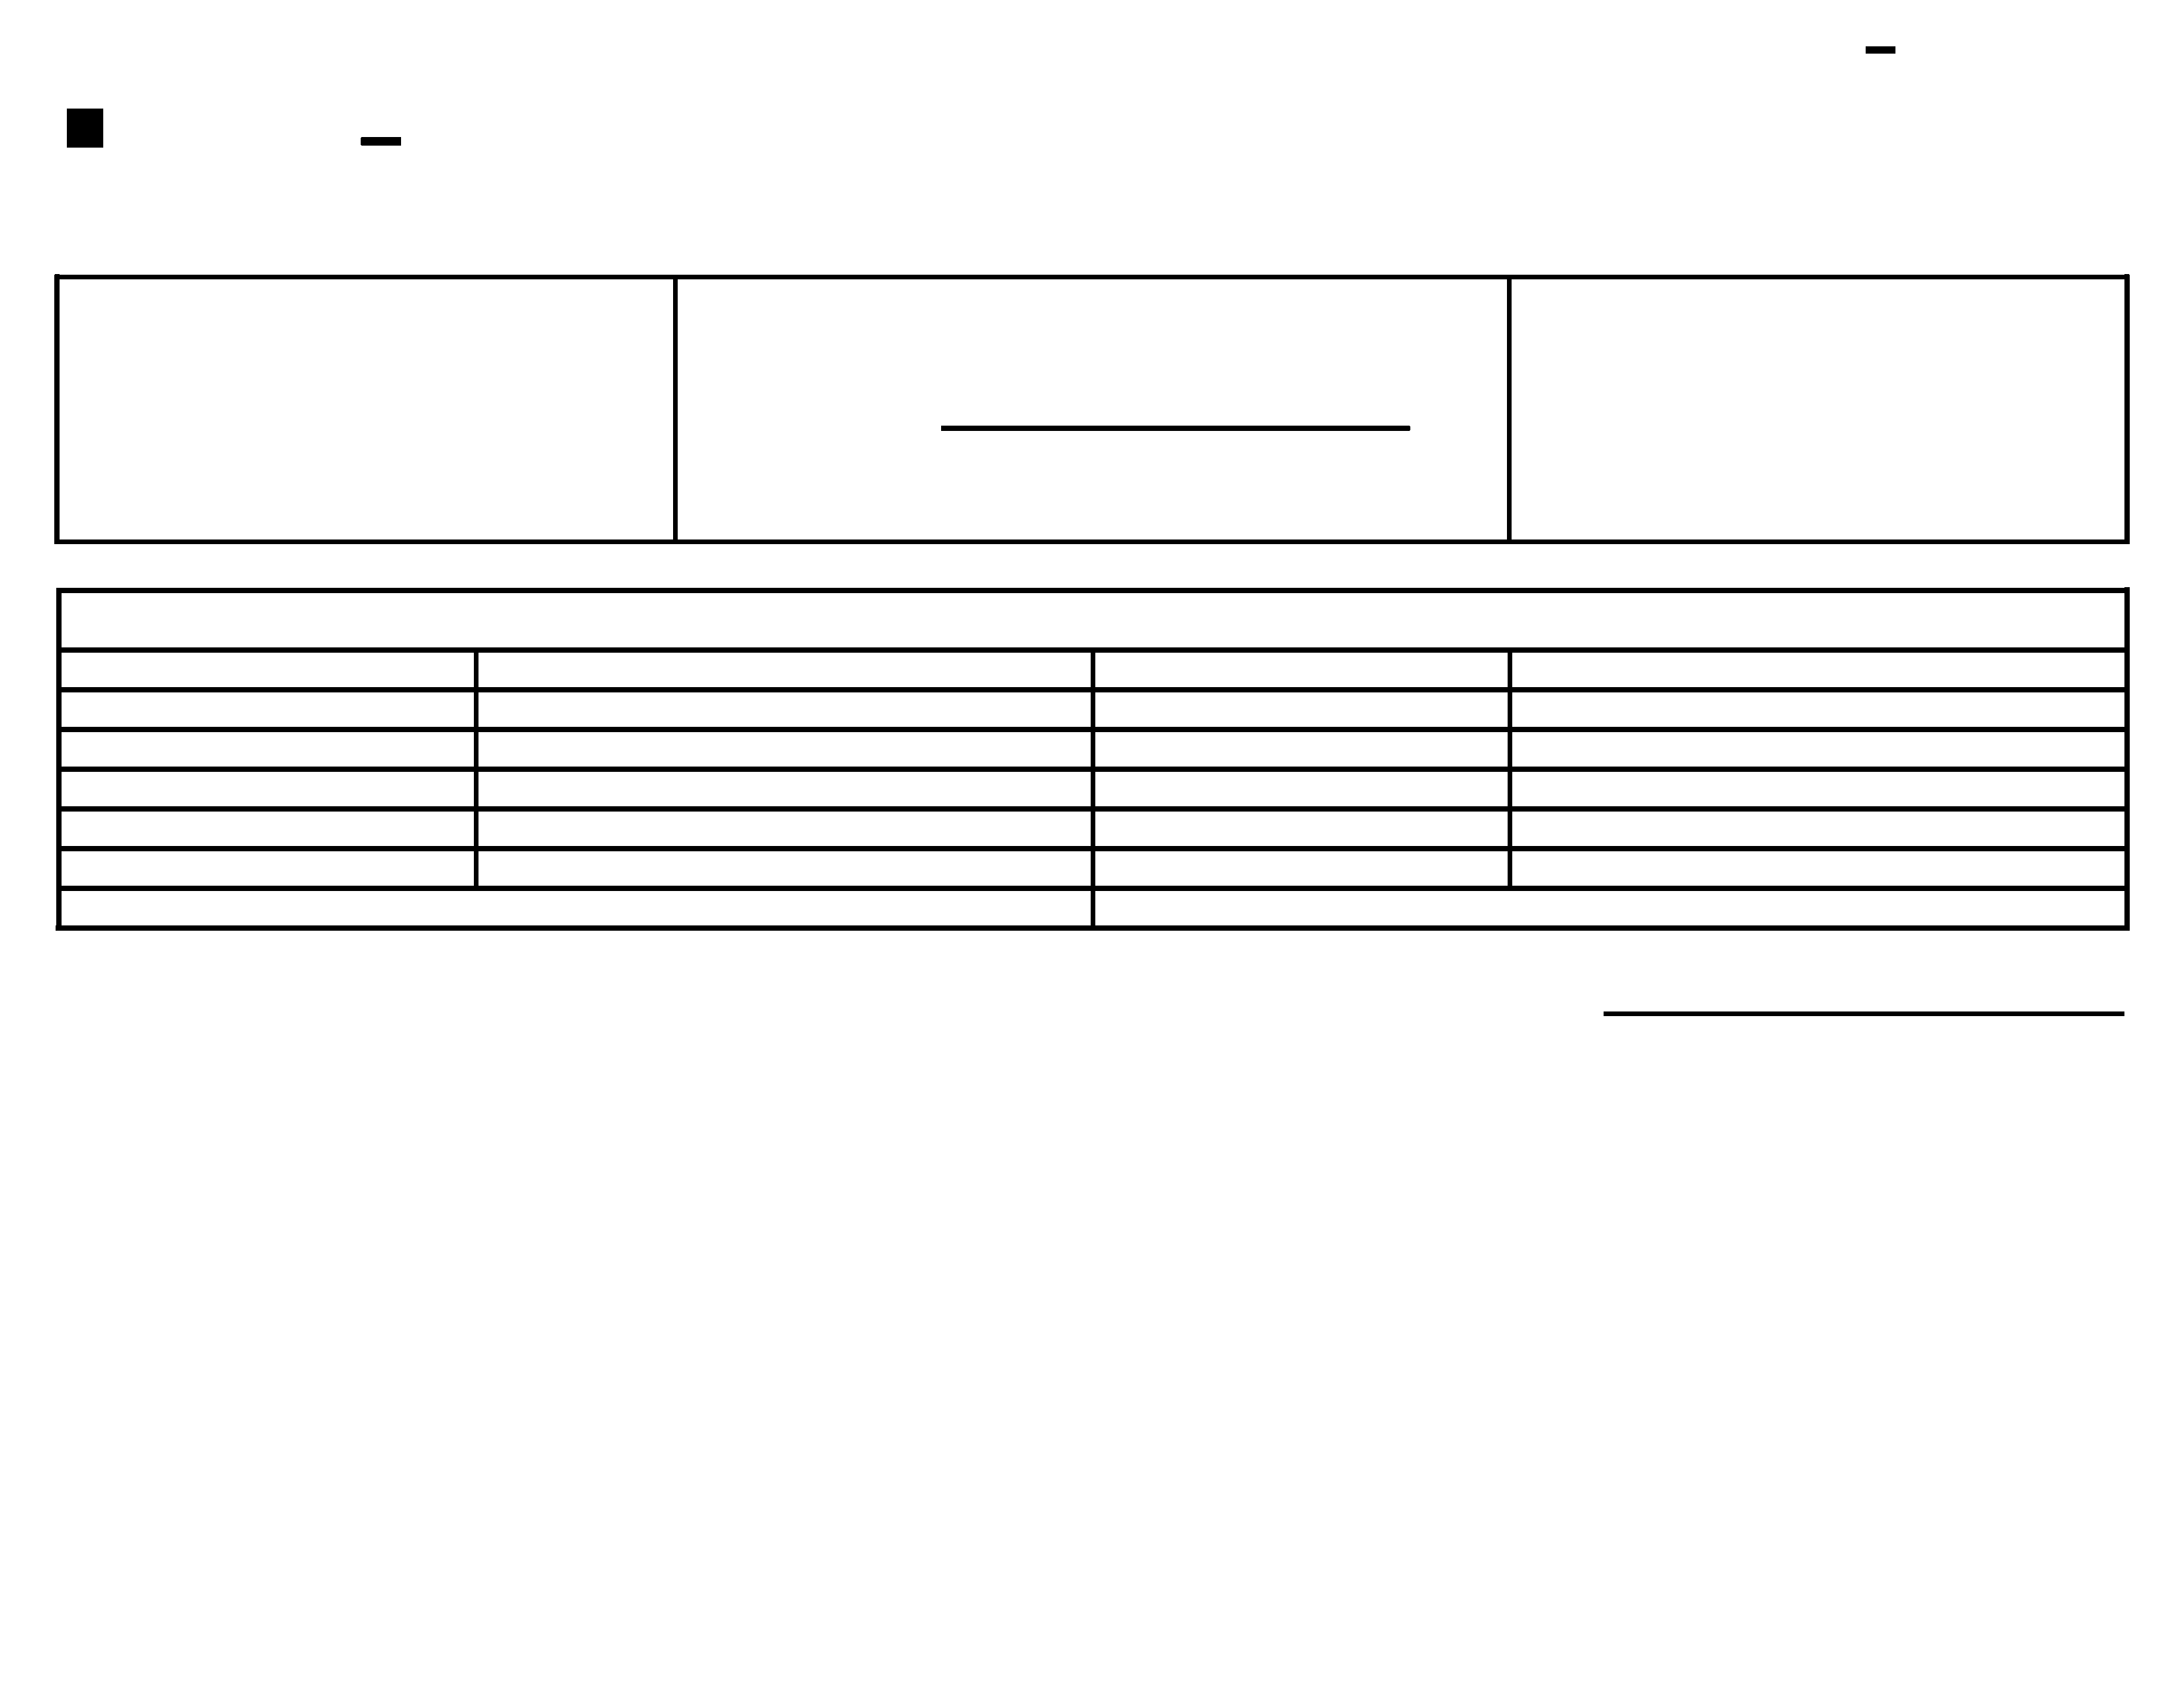

In [ ]:
(thresh, img_bin) = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin = (255-img_bin)

kernel_length = np.array(img).shape[1]//80
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

vert_struct = cv2.erode(img_bin, vertical_kernel, iterations=3)
vert_img = cv2.dilate(vert_struct, vertical_kernel, iterations=3)

horiz_struct = cv2.erode(img_bin, horizontal_kernel, iterations=1)
horiz_img = cv2.dilate(horiz_struct, horizontal_kernel, iterations=1)

alpha = 0.5
beta = 1.0 - alpha

combined_image = cv2.addWeighted(vert_img, alpha, horiz_img, beta, 0.0)
combined_image = cv2.erode(~combined_image, kernel, iterations=2)
(thresh,combined_image) = cv2.threshold(combined_image, 128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cv2_imshow(combined_image)